<a href="https://colab.research.google.com/github/StanAI7060/Something-new/blob/main/First_Advanced_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
X_train_full.shape

(50000, 32, 32, 3)

In [4]:
X_train_full.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
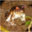

In [5]:
X_train_full[0]

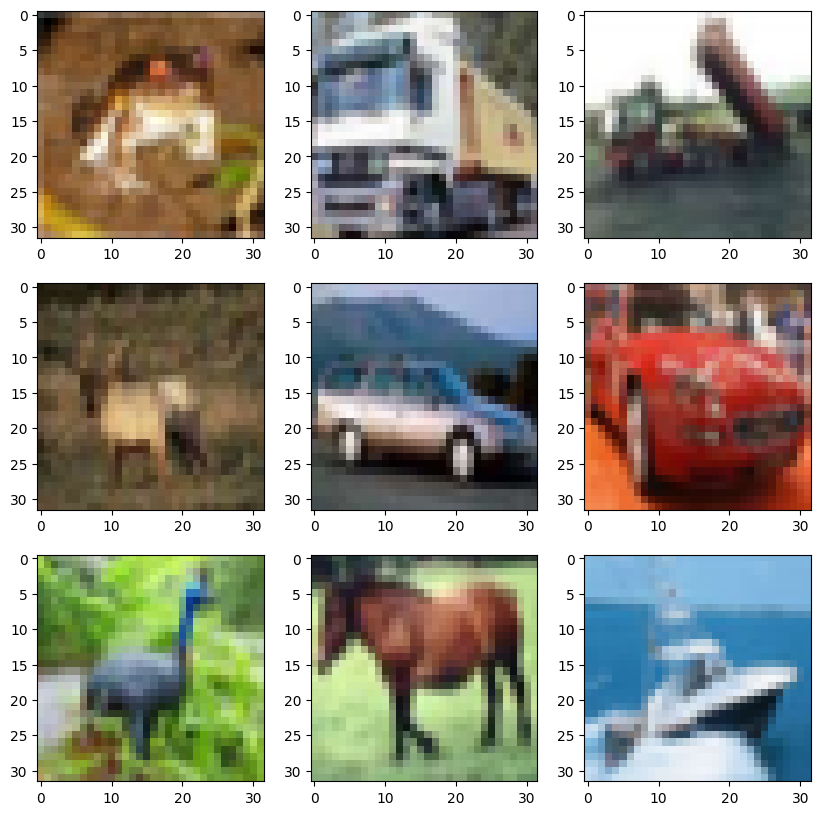

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [7]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
class_names[y_train_full[8][0]]

'ship'

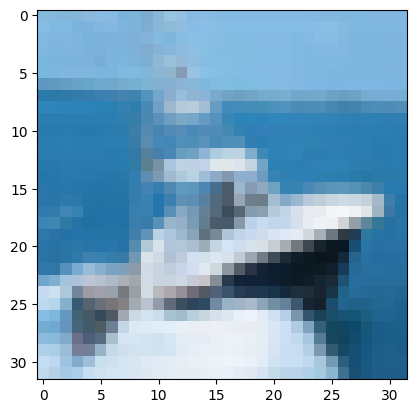

In [9]:
plt.imshow(X_train_full[8], cmap=plt.get_cmap('gray'))

In [10]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [11]:
X_train[0]

array([[[0.23529412, 0.32156863, 0.21176471],
        [0.15686275, 0.26666667, 0.14117647],
        [0.20392157, 0.31764706, 0.20392157],
        ...,
        [0.20784314, 0.16862745, 0.19607843],
        [0.25882353, 0.21568627, 0.23921569],
        [0.28627451, 0.24313725, 0.26666667]],

       [[0.43921569, 0.44705882, 0.44705882],
        [0.22745098, 0.27843137, 0.21960784],
        [0.22745098, 0.31764706, 0.20784314],
        ...,
        [0.21176471, 0.18431373, 0.20784314],
        [0.2627451 , 0.22745098, 0.25490196],
        [0.28235294, 0.24313725, 0.27058824]],

       [[0.66666667, 0.63137255, 0.69803922],
        [0.46666667, 0.4627451 , 0.47058824],
        [0.31372549, 0.34901961, 0.29019608],
        ...,
        [0.21960784, 0.19607843, 0.21960784],
        [0.2745098 , 0.24705882, 0.2745098 ],
        [0.28235294, 0.25098039, 0.27843137]],

       ...,

       [[0.35686275, 0.44313725, 0.36862745],
        [0.23137255, 0.3254902 , 0.24313725],
        [0.17647059, 0

In [12]:
# # 1cycle learning rate scheduler
# # code from: https://pub.towardsai.net/1cycle-learning-rate-scheduling-with-tensorflow-and-keras-74ae7ce277c8
# class OneCycleScheduler(keras.callbacks.Callback):
#     def __init__(self, iterations, max_rate, start_rate=None,
#                  last_iterations=None, last_rate=None):
#         self.iterations = iterations
#         self.max_rate = max_rate
#         self.start_rate = start_rate or max_rate / 10
#         self.last_iterations = last_iterations or iterations // 10 + 1
#         self.half_iteration = (iterations - self.last_iterations) // 2
#         self.last_rate = last_rate or self.start_rate / 1000
#         self.iteration = 0

#     def _interpolate(self, iter1, iter2, rate1, rate2):
#         return ((rate2 - rate1) * (self.iteration - iter1)
#                 / (iter2 - iter1) + rate1)

#     def on_batch_begin(self, batch, logs):
#         if self.iteration < self.half_iteration:
#             rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
#         elif self.iteration < 2 * self.half_iteration:
#             rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
#                                      self.max_rate, self.start_rate)
#         else:
#             rate = self._interpolate(2 * self.half_iteration, self.iterations,
#                                      self.start_rate, self.last_rate)
#         self.iteration += 1
#         keras.backend.set_value(self.model.optimizer.lr, rate)


# onecycle = OneCycleScheduler(30,0.04)
# , callbacks=[onecycle]

In [13]:
def exponential_decay(epoch):
        return 0.01*0.1**(epoch/10)

exponential_decay_fn = exponential_decay
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [14]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[32,32,3]),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(10, activation = "softmax")
            ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 alpha_dropout (AlphaDropou  (None, 3072)              0         
 t)                                                              
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 alpha_dropout_1 (AlphaDrop  (None, 300)               0         
 out)                                                            
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 alpha_dropout_2 (AlphaDrop  (None, 300)               0

In [16]:
model.layers

In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=60, validation_data = (X_valid, y_valid), batch_size=32, callbacks=[lr_scheduler])

1407/1407 [==============================] - 28s 20ms/step - loss: 1.8911 - accuracy: 0.3134 - val_loss: 1.9541 - val_accuracy: 0.3442 - lr: 3.1623e-06
Epoch 37/60
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8880 - accuracy: 0.3156 - val_loss: 1.9543 - val_accuracy: 0.3442 - lr: 2.5119e-06
Epoch 38/60
1407/1407 [==============================] - 20s 14ms/step - loss: 1.8897 - accuracy: 0.3125 - val_loss: 1.9544 - val_accuracy: 0.3442 - lr: 1.9953e-06
Epoch 39/60
1390/1407 [============================>.] - ETA: 0s - loss: 1.8936 - accuracy: 0.3156

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

In [ ]:
import seaborn as sb

# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()